In [287]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
import pandas as pd
from scipy.stats import gaussian_kde
#import datashader as ds
#from datashader.mpl_ext import dsshow
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


# Pixels Per Project

In [211]:
def make_update_pos():
    update_pos = dict()
    with open("/scratch/yw180/place/data/sorted_tile_placements_idx.csv", "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for line in reader:
            update = int(line[0])
            x = int(line[3])
            y = int(line[4])
            update_pos[update] = (x,y)
    return update_pos

In [288]:
def pixels_per_project(update_file):
    update_pos = make_update_pos()
    pixel_per_project = dict()
    line_count = 0
    with open(update_file, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for line in reader:
            pos_set = set()
#             if len(line) >= 15:
            for item in line:
                item = int(item)
                pos_set.add(update_pos[item])
            pixel_per_project[line_count] = len(pos_set)
            line_count += 1
    return pixel_per_project

In [289]:
successful_pix = pixels_per_project("/home/yw180/place/data/merged_8/merge_user_emb/successful.csv")
unsuccessful_pix = pixels_per_project("/home/yw180/place/data/merged_8/merge_user_emb/unsuccessful.csv")

In [228]:
len(unsuccessful_pix)

4842

# Update Per project

In [290]:
def updates_per_project(update_file):
    up_per_proj = dict()
    line_count = 0
    with open(update_file, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for line in reader:
#             if len(line) >= 15:
            up_per_proj[line_count] = len(line)
            line_count += 1
    return up_per_proj

In [291]:
def users_per_project(user_file):
    user_per_proj = dict()
    line_count = 0
    with open(user_file, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for line in reader:
            user_per_proj[line_count] = len(line)
            line_count += 1
    return user_per_proj

In [312]:
successful_up = updates_per_project("/home/yw180/place/data/merged_8/merge_user_emb/successful.csv")
unsuccessful_up = updates_per_project("/home/yw180/place/data/merged_8/merge_user_emb/unsuccessful.csv")

In [313]:
successful_user = users_per_project("/home/yw180/place/data/merged_8/merge_user_emb/successful_user.csv")
unsuccessful_user = users_per_project("/home/yw180/place/data/merged_8/merge_user_emb/unsuccessful_user.csv")

In [179]:
def Create_Array(Dict_1,Dict_2):
    '''
        Simple function to create arrays from two dictionaries with same project keys. 
    '''
    X = np.zeros(len(Dict_2))
    Y = np.zeros(len(Dict_2))
    i = 0
    for p in Dict_1.keys():
        if p in Dict_2.keys():
            X[i] = Dict_1[p]
            Y[i] = Dict_2[p] 
            i = i + 1   
    return X,Y   


In [294]:
X_succ,Y_succ = Create_Array(successful_pix,successful_up)
X_unsucc,Y_unsucc = Create_Array(unsuccessful_pix,unsuccessful_up)


In [314]:
X_user_succ, Y_user_succ = Create_Array(successful_pix, successful_user)
X_user_unsucc, Y_user_unsucc = Create_Array(unsuccessful_pix, unsuccessful_user)

ScatterDensityArtist(size=(1, 1))
slope: 1.167457884727241


<Figure size 640x480 with 0 Axes>

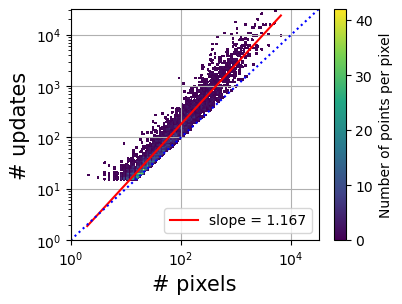

In [226]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap

#Inverse cumulative density funcition

%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name, col, lab):
    white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=50000)

    plt.clf()
    fig = plt.figure(figsize=(4,3))
    ax = plt.subplot(111,projection='scatter_density') 
    density = ax.scatter_density(X, Y, cmap=white_viridis)
    print(density)
    fig.colorbar(density, label='Number of points per pixel')
    logx = np.log(X)
    logy = np.log(Y)
    coeffs = np.polyfit(logx,logy,1)
    poly = np.poly1d(coeffs)
    yfit = lambda X: np.exp(poly(np.log(X)))
    plt.loglog(np.unique(X),yfit(np.unique(X)), color='red',label = "slope = " + str(round(coeffs[0], 3)))
    ax.axline((1, 1),  (10, 10  ), color="blue", linestyle=":")

    ax.set_ylabel('# updates', fontsize=15)
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1,10**4.5])
    ax.set_ylim([1,10**4.5])
    ax.legend(loc = 'lower right')
    ax.grid()
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    return coeffs[0]

slope = plot_updates_vs_pixels(X_unsucc, Y_unsucc, "plot_updates_vs_pixels.svg", "#fa4d56", "Successful")
print("slope:", slope)

# Plot User vs. Pixel

In [326]:
def plot_vs_plot_same_graph(X,Y):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, s=10, c='#002d9c', marker="o", label='Failed', alpha = 0.8)
#     ax.scatter(failedX,failedY, s=10, c='#fa4d56', marker="x", label='Failed', alpha = 0.5)
    ax.set_ylabel('# negative updates', fontsize=15)
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1,10**6])
    ax.set_ylim([1,10**6])
    ax.legend(loc = 'lower right')
    ax.grid()
    ax.axline((1, 1),  (10, 10), color="black", linestyle=":")


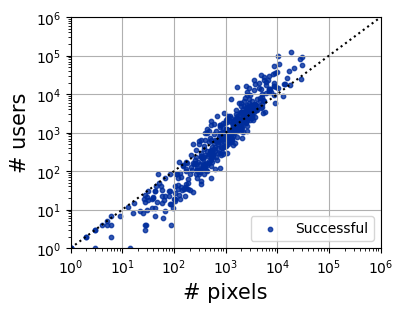

In [317]:
plot_vs_plot_same_graph(X_user_succ,Y_user_succ)


In [318]:
import pickle
succ_negative_path = "/home/yw180/place/data/merged_8/merge_user_emb/succ_negative.pkl"
failed_negative_path = "/home/yw180/place/data/merged_8/merge_user_emb/failed_negative.pkl"
with open(succ_negative_path, 'rb') as f:
    succ_negative = pickle.load(f)
    
with open(failed_negative_path, 'rb') as f:
    failed_negative = pickle.load(f)

In [324]:
X_succ_negative,Y_succ_negative = Create_Array(successful_pix,succ_negative)
X_failed_negative,Y_failed_negative = Create_Array(unsuccessful_pix,failed_negative)


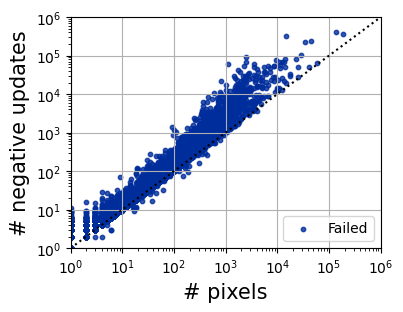

In [327]:
plot_vs_plot_same_graph(X_failed_negative,Y_failed_negative)
